In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

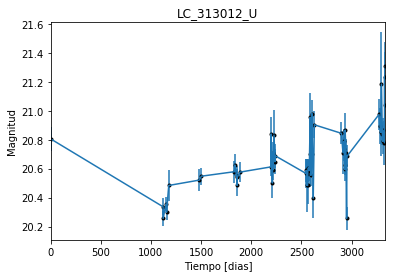

In [2]:
data = np.genfromtxt('LC_313012_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_313012_U')
plt.savefig("LC_313012_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

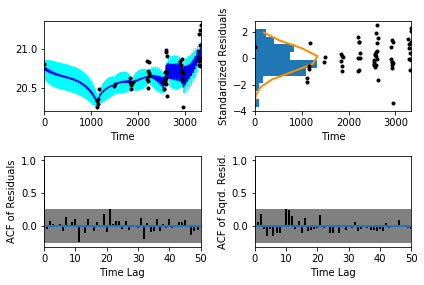

In [5]:
sample.assess_fit()

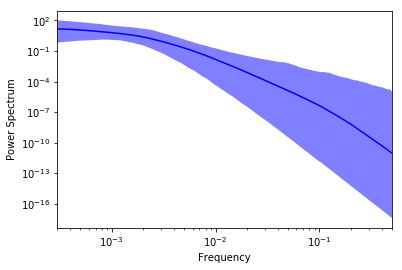

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

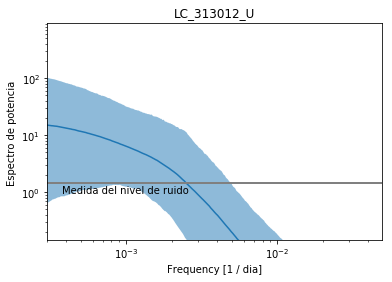

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_313012_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_313012_U')

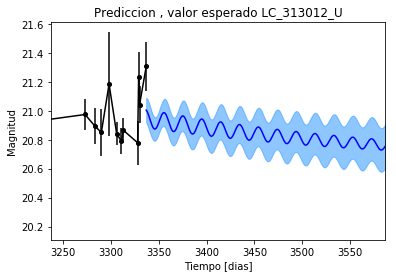

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_313012_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_313012_U')

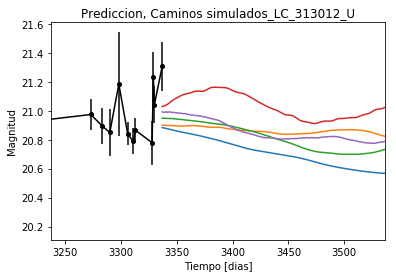

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_313012_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


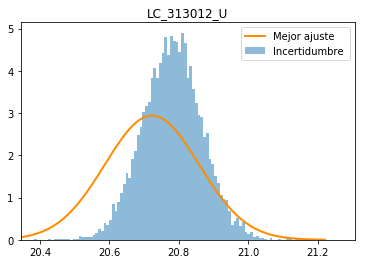

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_313012_U')
plt.savefig("Mejor_ajuste_LC_313012_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_313012_U')

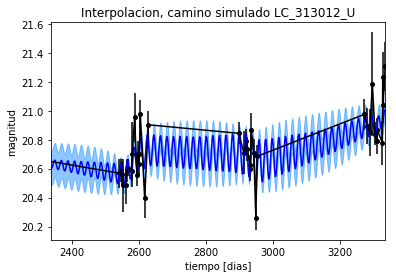

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_313012_U')

Text(0.5,1,'Interpolacion, camino simulado LC_313012_U')

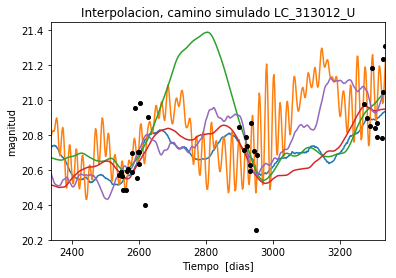

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_313012_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1022.51173578
Median: 0.00734106340564
Standard deviation: 0.180153262313
68% credibility interval: [ 0.00072568  0.14290866]
95% credibility interval: [  3.44507768e-04   7.18862052e-01]
99% credibility interval: [  3.07521191e-04   9.40340283e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1086.50431071
Median: 0.0018795185111
Standard deviation: 0.0524444564564
68% credibility interval: [ 0.0005071   0.01610023]
95% credibility interval: [ 0.00032993  0.15022561]
99% credibility interval: [  3.04071385e-04   3.88370235e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1143.831669
Median: 0.0233734363396
Standard de

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1984.63751589
Median: 54.7987174165
Standard deviation: 1.59780387993
68% credibility interval: [ 52.9515049   55.92042313]
95% credibility interval: [ 50.48173496  56.60640589]
99% credibility interval: [ 48.73137497  57.17734565]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 599.598738883
Median: 0.599250204948
Standard deviation: 2.1435243229
68% credibility interval: [ 0.06343061  3.78173241]
95% credibility interval: [ 0.01541006  7.42106754]
99% credibility interval: [ 0.00972337  9.71176264]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 912.209588238
Median: 0.297730458193
Standard deviation: 7.45039727357
68% credibility interval: [ 0.01023826  6.23142936]
95% credibility interval: [  7.28017811e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 12007.9979772
Median: 4.15226034299e-19
Standard deviation: 1.44399524704e+46
68% credibility interval: [  3.82833950e-60   4.46211345e-03]
95% credibility interval: [  1.34995836e-112   9.48016392e+020]
99% credibility interval: [  2.16366553e-119   4.53920046e+045]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2988.00485052
Median: 20.6505341669
Standard deviation: 0.106224243828
68% credibility interval: [ 20.56466741  20.74078657]
95% credibility interval: [ 20.45175746  20.88158317]
99% credibility interval: [ 20.34360648  21.01355444]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 538.003071375
Median: 0.00474375489825
Standard deviation: 0.218543747756
68% credibility interval: [ 0.          0.27188361]
95% credibility interval: [ 0.          0.82211928]
99% credibility interval: [ 0.         0.9646648]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 538.003071375
Median: 0.00474375489825
Standard deviation: 0.218543747756
68% credibility interval: [ 0.          0.27188361]
95% credibility interval: [ 0.          0.82211928]
99% credibility interval: [ 0.         0.9646648]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 687.312235053
Median: 0.0
Standard deviation: 0.000832801696214
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1984.63751589
Median: 54.7987174165
Standard deviation: 1.59780387993
68% credibility interval: [ 52.9515049   55.92042313]
95% credibility interval: [ 50.48173496  56.60640589]
99% credibility interval: [ 48.73137497  57.17734565]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3878.66437504
Median: 0.04524613569
Standard deviation: 0.0603641408975
68% credibility interval: [ 0.02549384  0.08815799]
95% credibility interval: [ 0.01537806  0.19835607]
99% credibility interval: [ 0.011988    0.35187382]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2771.85917845
Median: 1.33872566972
Standard deviation: 0.198613741471
68% credibility interval: [ 1.16292356  1.55457784]
95% credibility interval: [ 1.0067702   1.79788377]
99% credibility interval: [ 0.92226286  1.92474538]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 497.192788778
Median: 0.000160899957324
Standard deviation: 0.176639860847
68% credibility interval: [  1.66970399e-06   7.36261803e-03]
95% credibility interval: [  1.45554241e-25   1.92877147e-01]
99% credibility interval: [  5.70388157e-51   1.24492407e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1022.51173578
Median: (-0.0461252617294-2.6533226344j)
Standard deviation: 1.7795570108
68% credibility interval: [-0.89792160+0.j        -0.00455961-0.0112629j]
95% credibility interval: [ -4.51674348e+00+0.j          -2.16460614e-03-1.35138056j]
99% credibility interval: [ -5.90833225e+00+0.j         -1.93221263e-03-1.1865808j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1086.50431071
Median: (-0.0118093630935+0.0786847137877j)
Standard deviation: 1.41213510934
68% credibility interval: [-0.10116072+0.06220364j -0.00318618+0.j        ]
95% credibility interval: [-0.94389532+3.29810233j -0.00207298+0.j        ]
99% credibility interval: [ -2.44020215e+00+2.78418303j  -1.91053686e-03+0.0129839j ]
Posterior summary 